In [2]:
import sklearn
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1, noise=15.0, random_state=42)


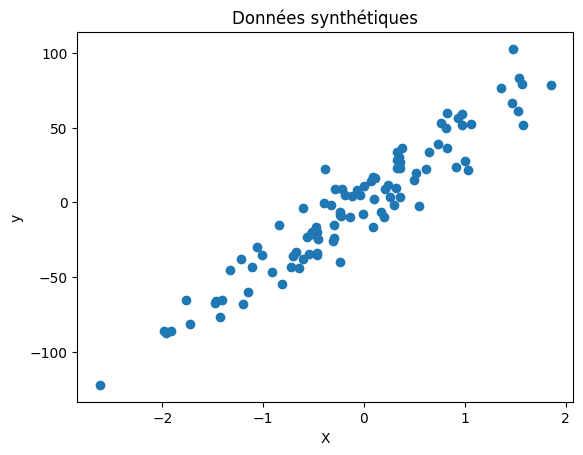

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.title("Données synthétiques")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [5]:
print("θ₀ (intercept) :", model.intercept_)
print("θ₁ (coef)      :", model.coef_[0])


θ₀ (intercept) : 1.7476729807904583
θ₁ (coef)      : 45.785204830943506


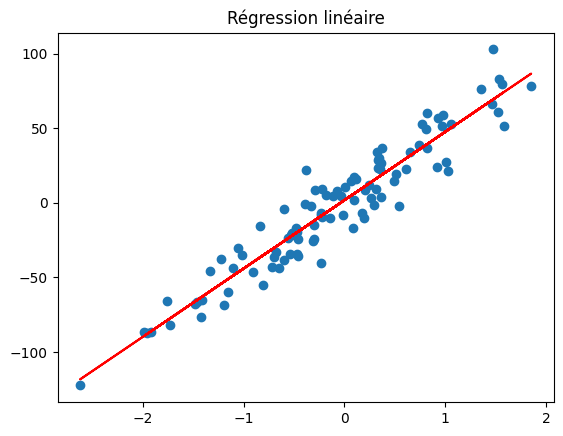

In [6]:
y_pred = model.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color="red")
plt.title("Régression linéaire")
plt.show()


In [7]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"MSE = {mse:.2f}, R² = {r2:.2f}")


MSE = 175.62, R² = 0.91


**Jour 9** – Régression logistique & métriques de classification



In [10]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    flip_y=0.1,
    class_sep=1.5,
    random_state=0
)


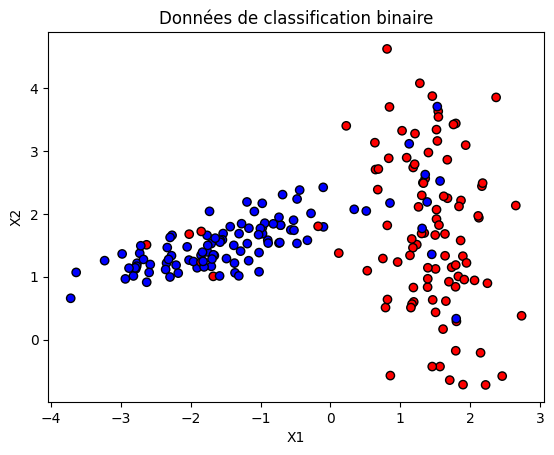

In [11]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', edgecolor='k')
plt.title("Données de classification binaire")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


In [12]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, y)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [13]:
y_pred = clf.predict(X)
y_prob = clf.predict_proba(X)[:,1]  # probabilité d’appartenir à la classe 1


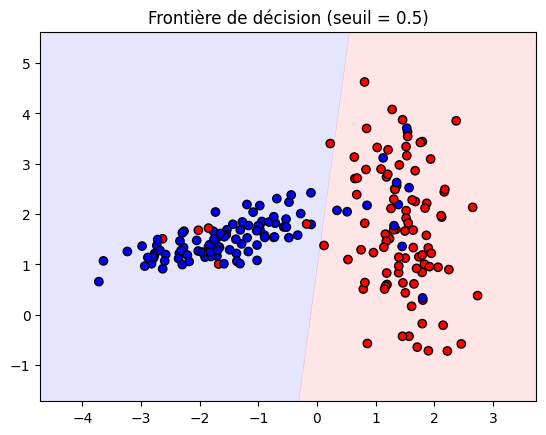

In [14]:
import numpy as np

# Crée une grille pour X1, X2
xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200),
    np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200)
)
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:,1].reshape(xx.shape)

plt.contourf(xx, yy, probs, levels=[0,0.5,1], alpha=0.2, cmap='bwr')
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', edgecolor='k')
plt.title("Frontière de décision (seuil = 0.5)")
plt.show()


In [15]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)

acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
cm = confusion_matrix(y, y_pred)

print(f"Accuracy  : {acc:.2f}")
print(f"Precision : {prec:.2f}")
print(f"Recall    : {rec:.2f}")
print(f"F1-score  : {f1:.2f}")
print("Matrice de confusion :\n", cm)


Accuracy  : 0.91
Precision : 0.89
Recall    : 0.92
F1-score  : 0.91
Matrice de confusion :
 [[90 11]
 [ 8 91]]
